In [2]:
import os
from netCDF4 import Dataset
import netCDF4 as nc
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from scipy.interpolate import griddata
import matplotlib.ticker as mticker

In [3]:
# To use PLUMBER2_GPP_common_utils, change directory to where it exists
os.chdir('/g/data/w97/mm3972/scripts/Drought/Post_drought_rainfall')
from common_utils import *

# Check missing values

In [19]:
checked_file  = '/g/data/w97/mm3972/data/MODIS/MODIS_LAI/AUS/regrid_2_AWAP_5km_daily/MCD15A3H.061_500m_aid0001_LAI_regridded_daily_2002-2024.nc'

In [20]:
f_check = nc.Dataset(checked_file,'r')
var     = f_check.variables['Lai_500m'][:]

In [21]:
var_checked = np.where(var > 20., np.nan, var)

In [22]:
loc_lon = [135,155]
loc_lat = [-40,-25]

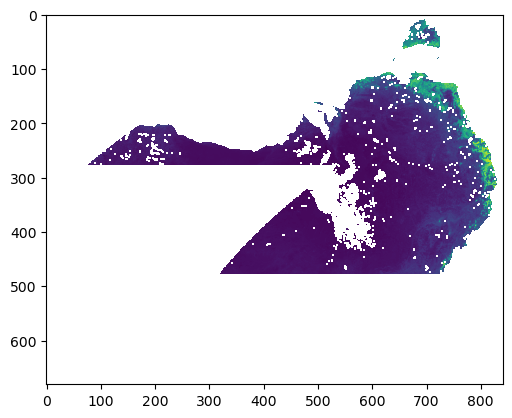

In [31]:
plt.imshow(np.mean(var_checked,axis=0))

In [32]:
accumulated_var = np.cumsum(var_checked, axis=0)

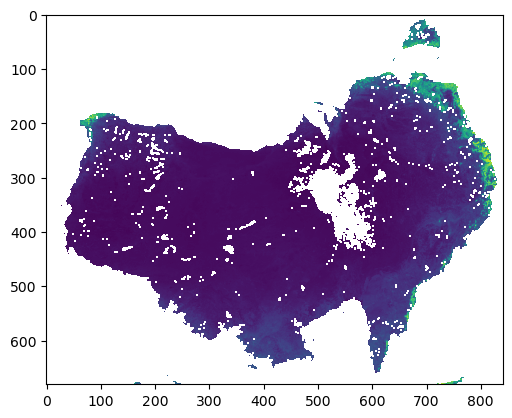

In [60]:
plt.imshow(accumulated_var[6620,:,:])

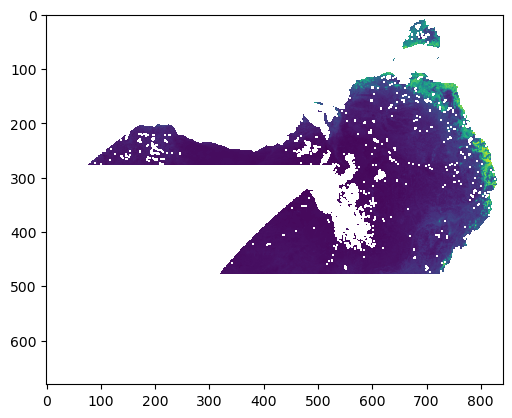

In [57]:
plt.imshow(accumulated_var[6621,:,:])

In [58]:
f_check.variables['time'][6621]

masked_array(data=8970,
             mask=False,
       fill_value=999999,
            dtype=int32)

/jobfs/122303491.gadi-pbs/ipykernel_226837/3149536100.py:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure(figsize=(6,5))


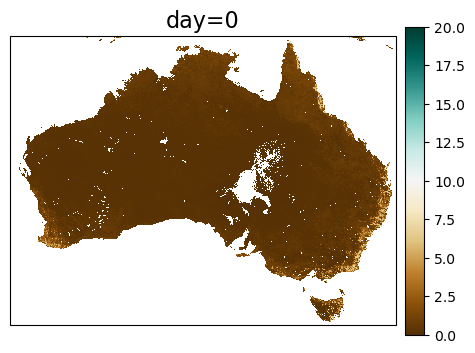

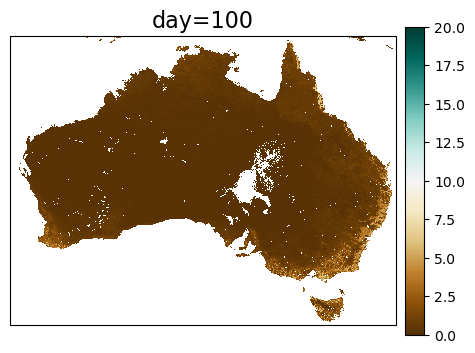

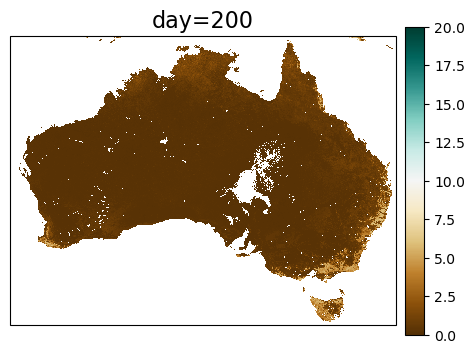

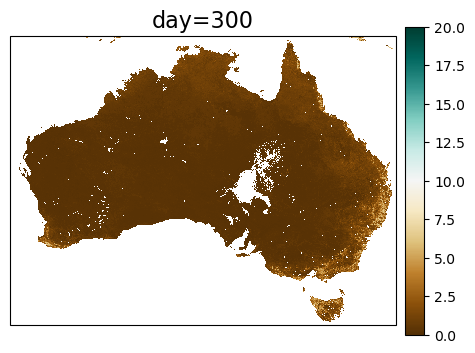

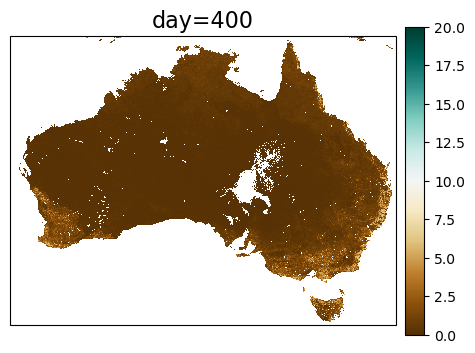

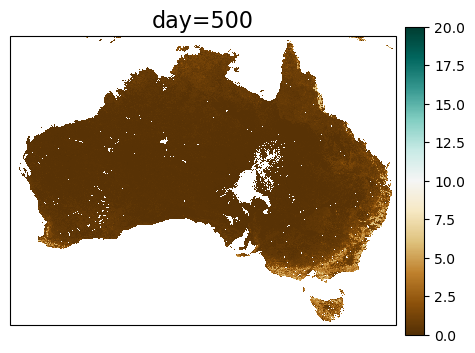

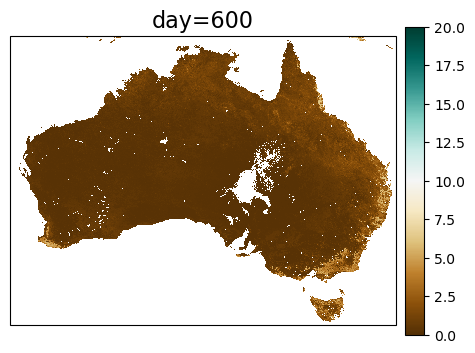

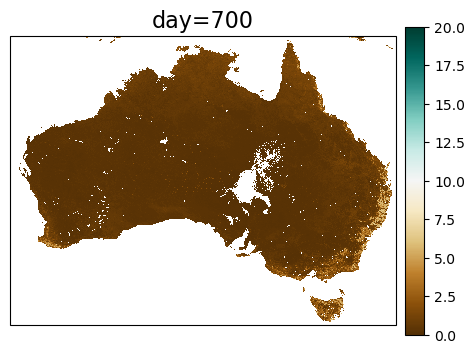

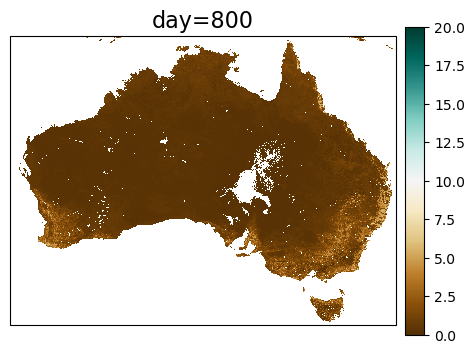

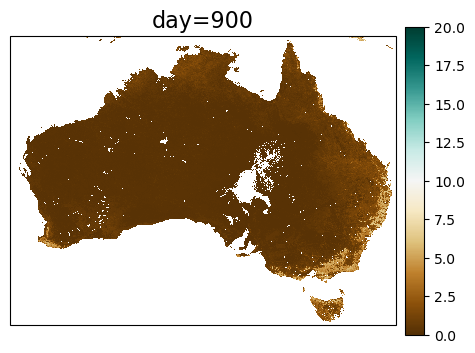

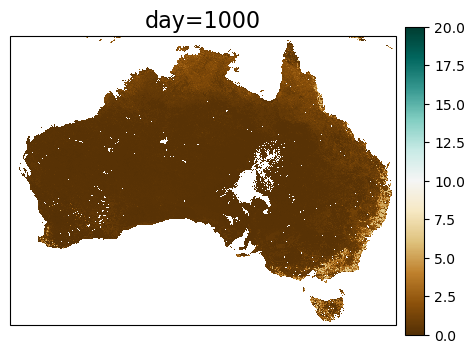

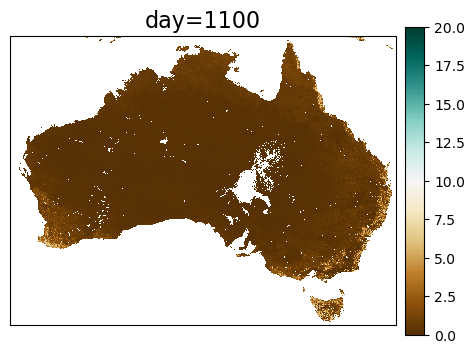

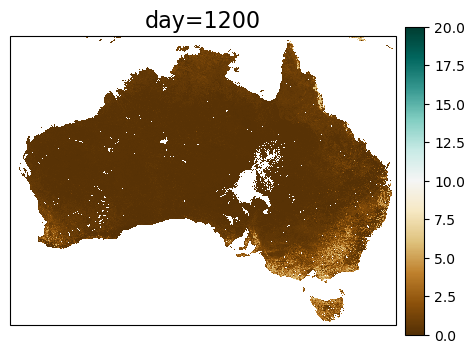

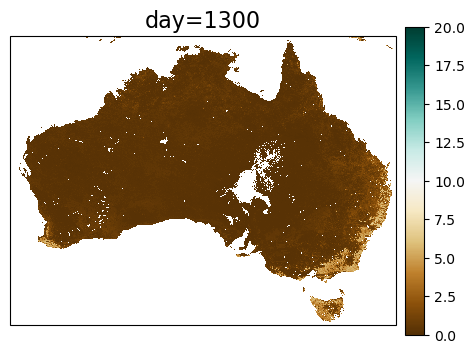

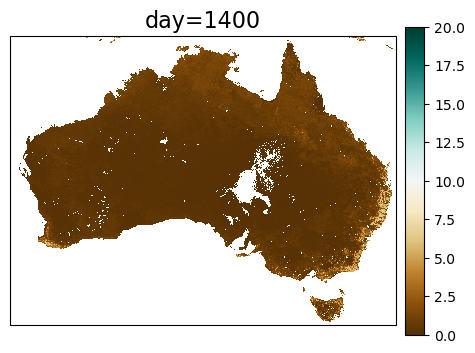

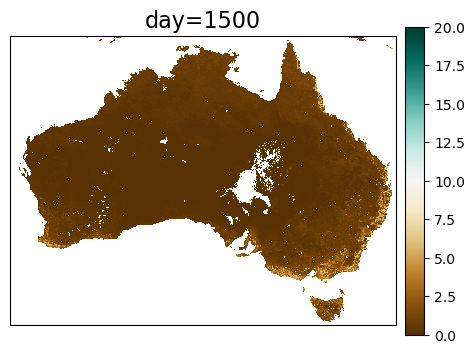

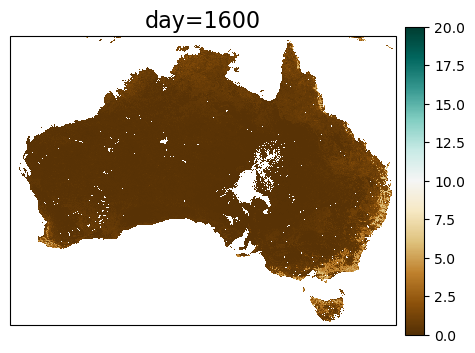

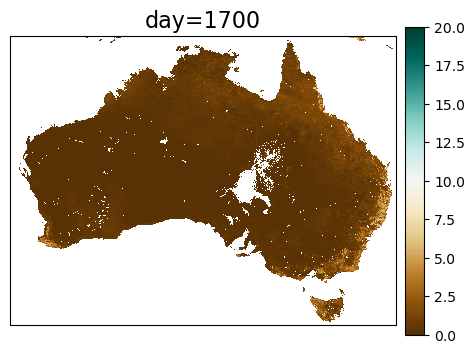

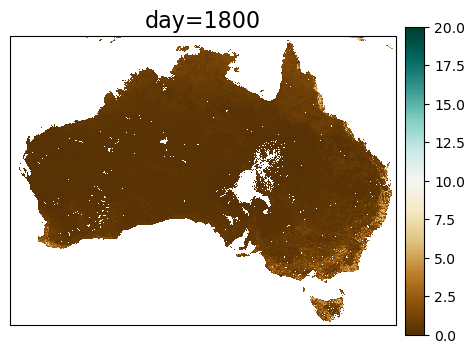

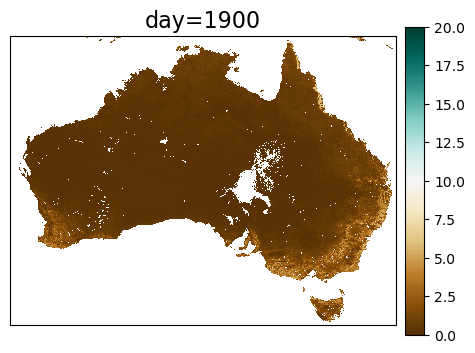

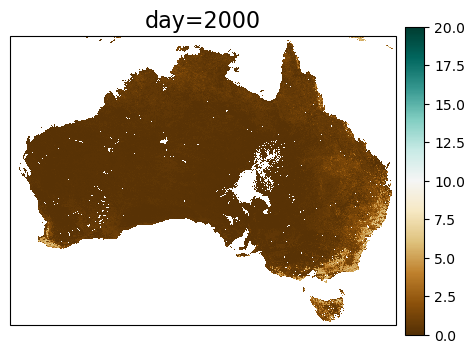

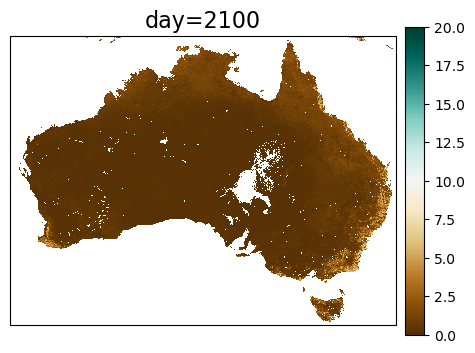

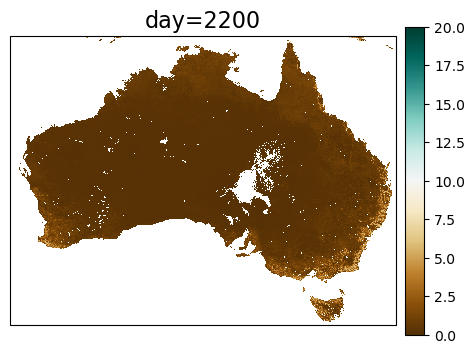

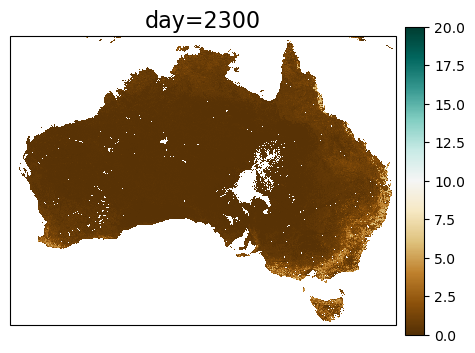

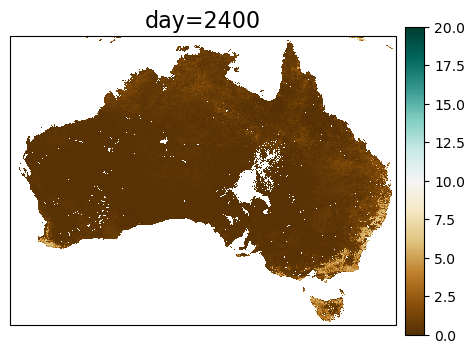

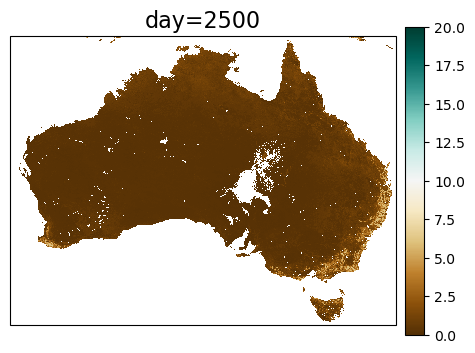

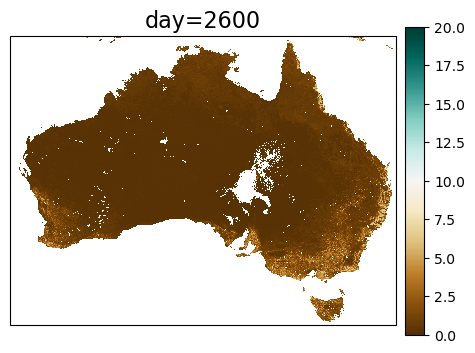

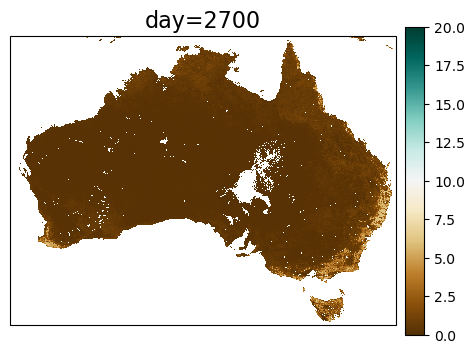

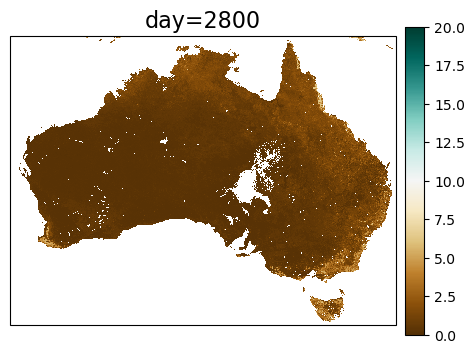

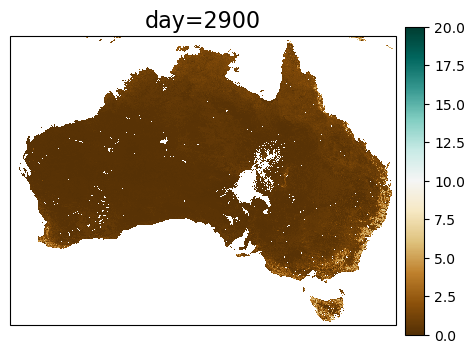

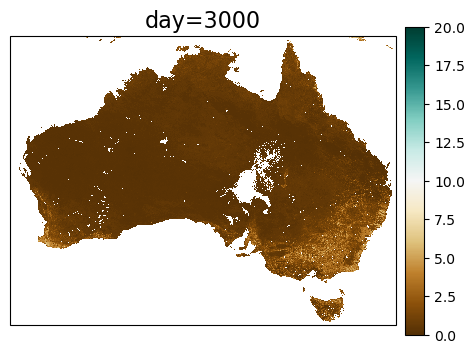

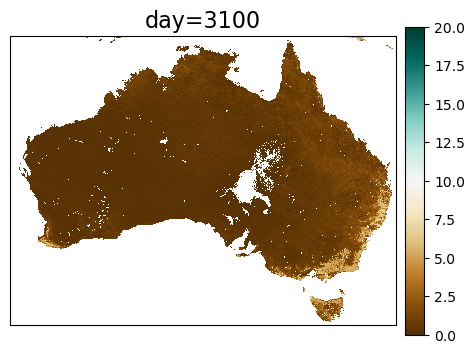

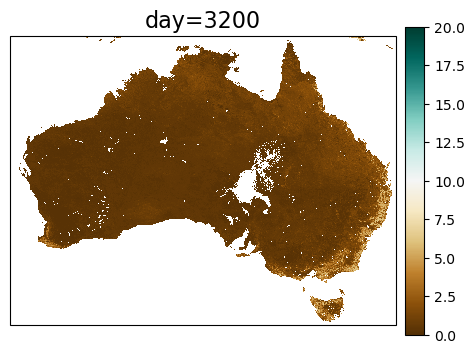

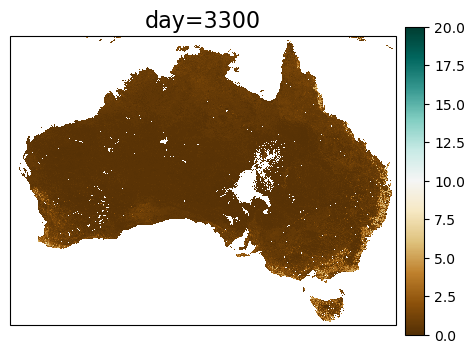

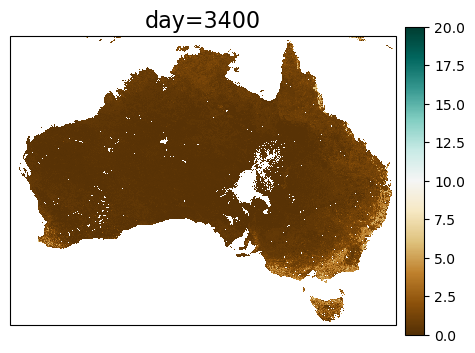

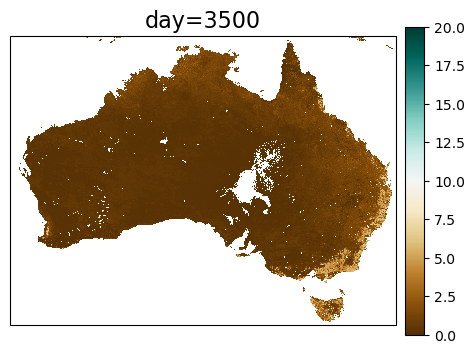

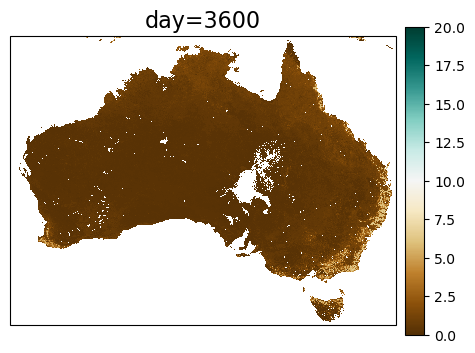

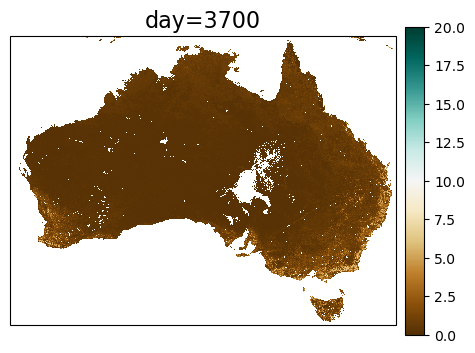

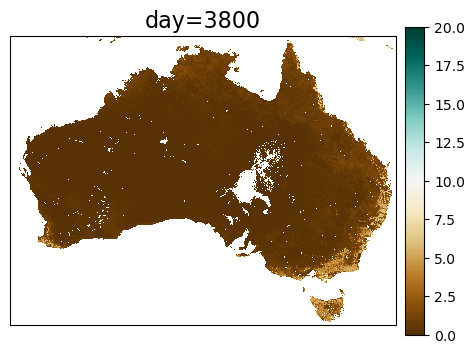

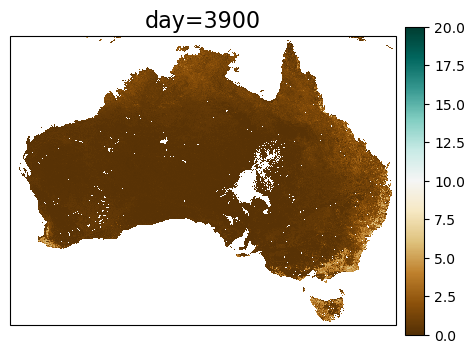

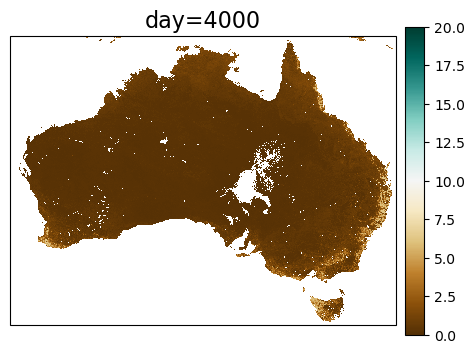

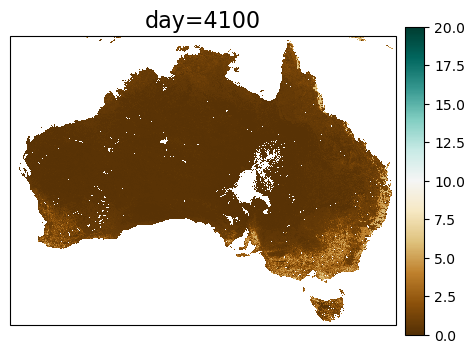

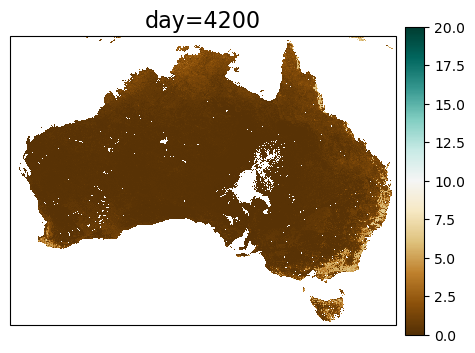

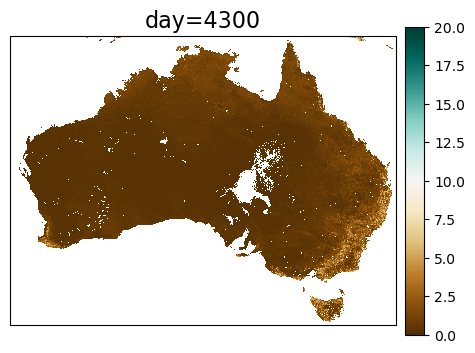

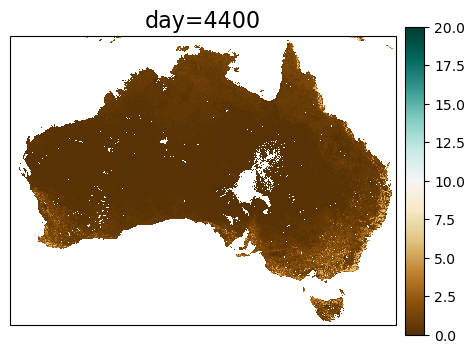

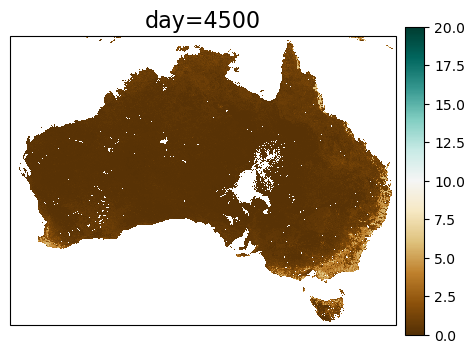

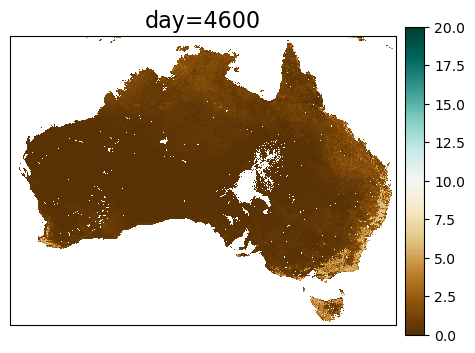

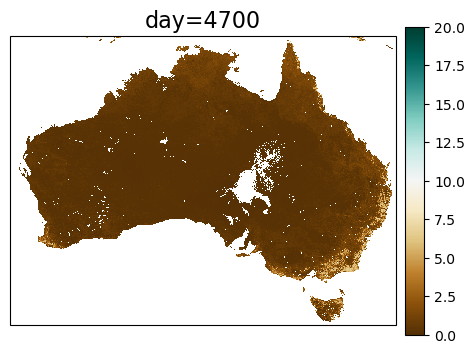

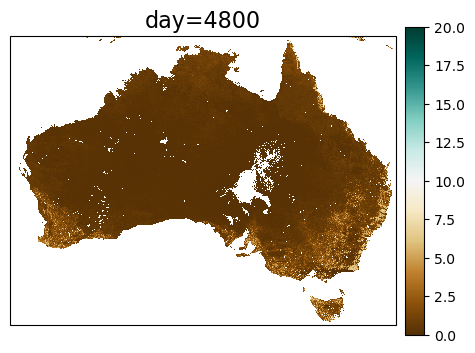

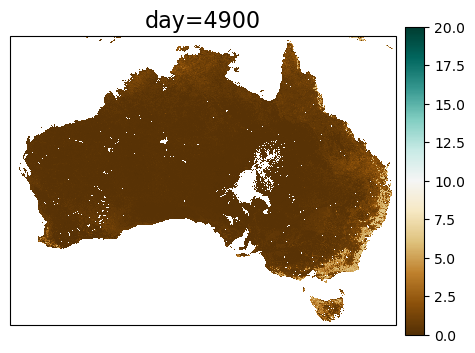

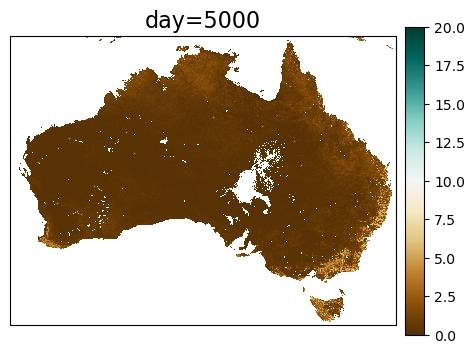

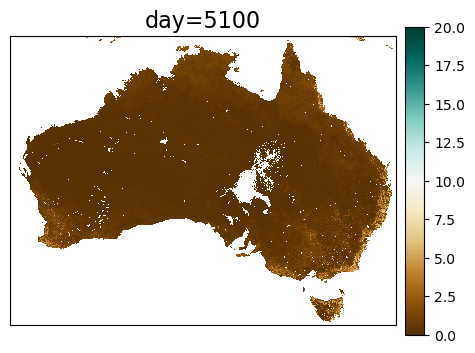

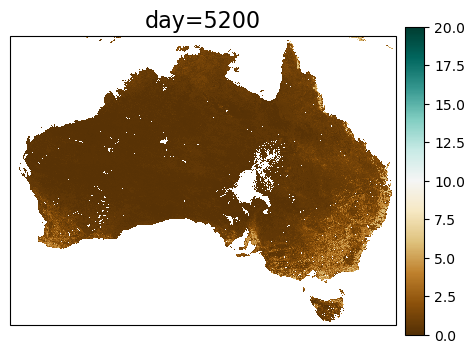

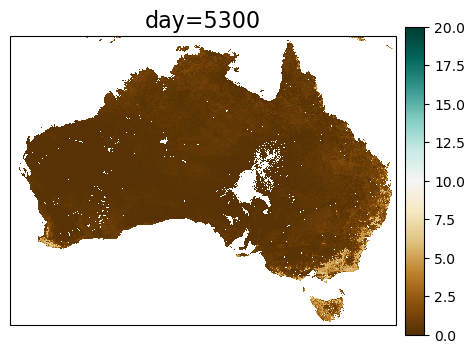

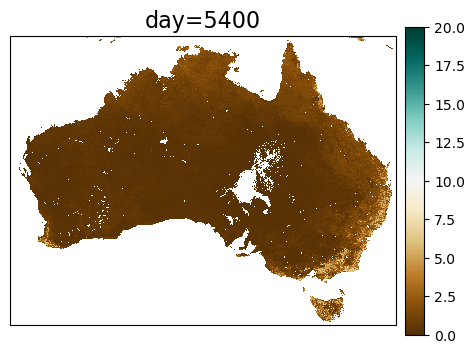

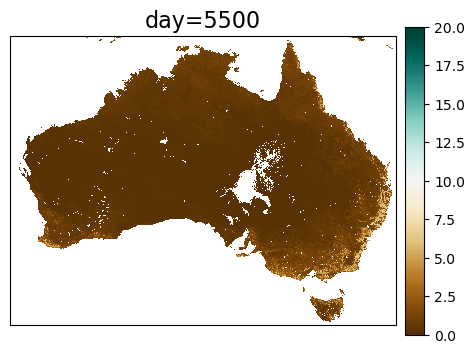

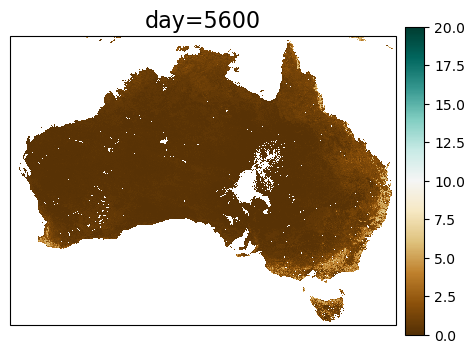

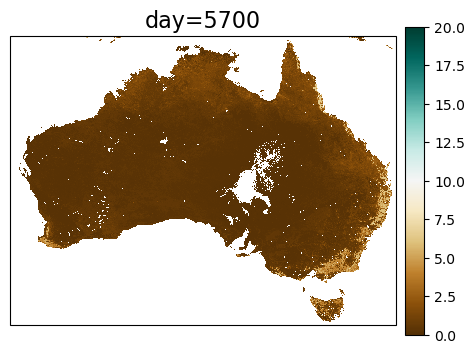

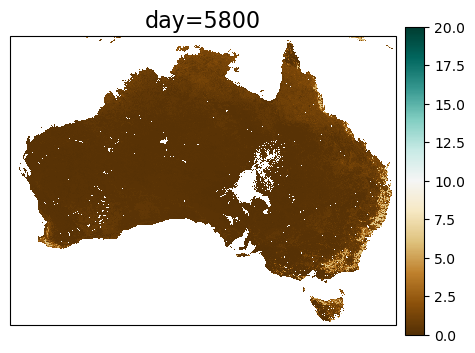

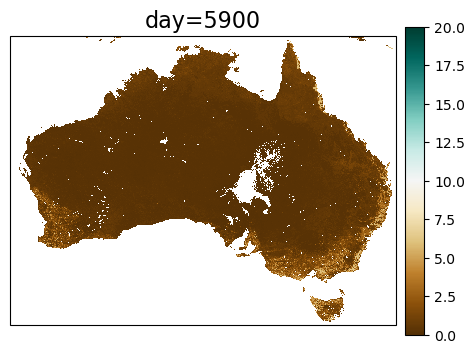

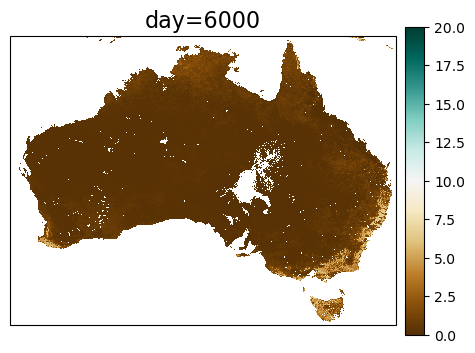

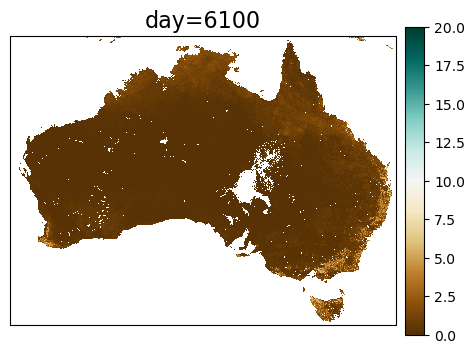

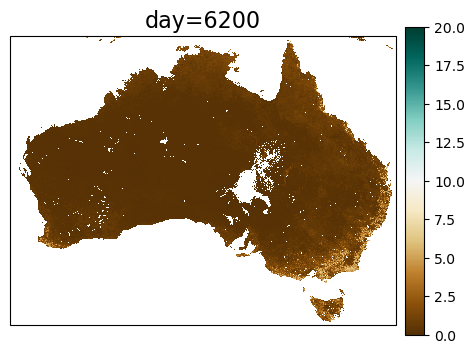

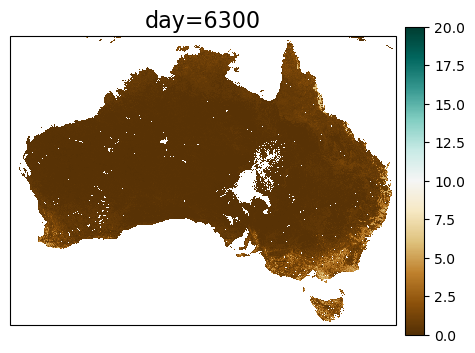

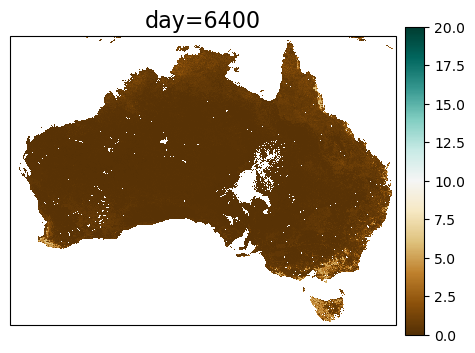

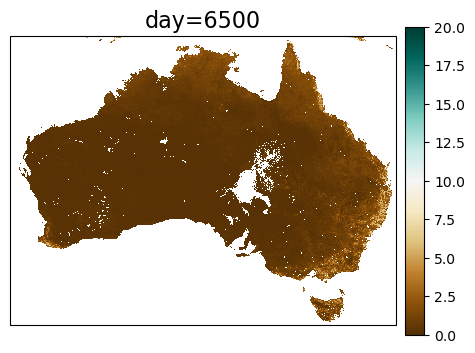

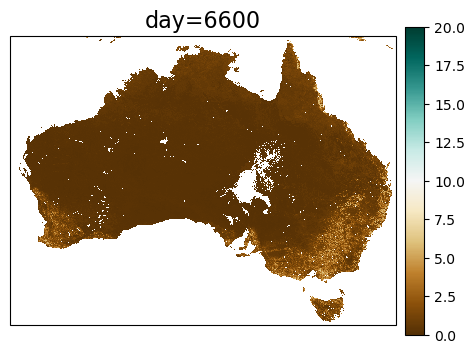

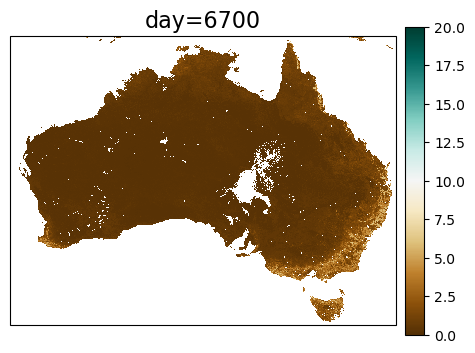

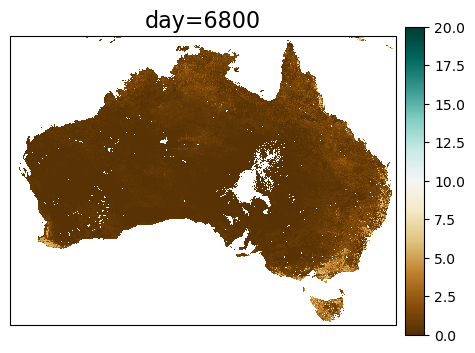

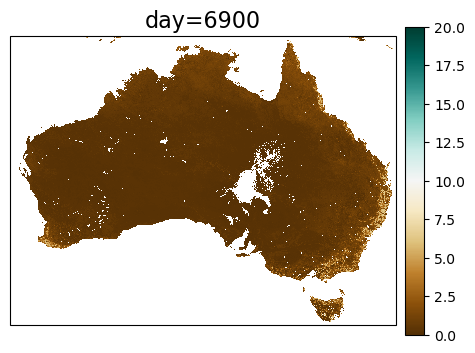

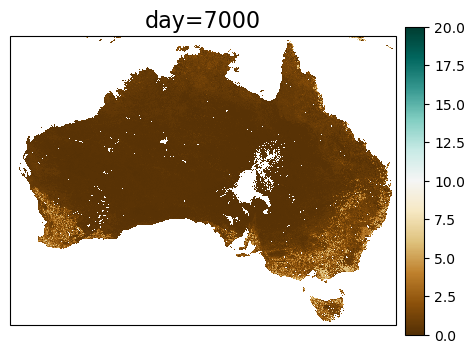

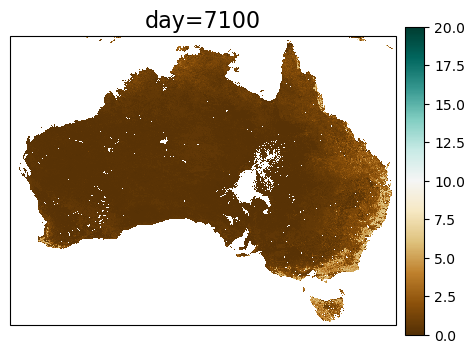

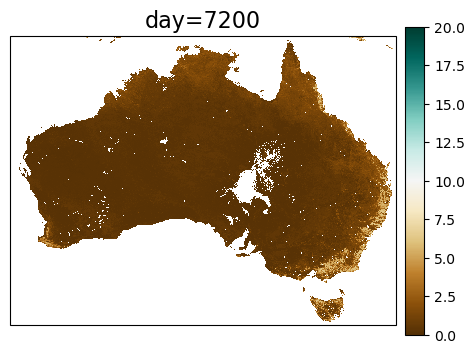

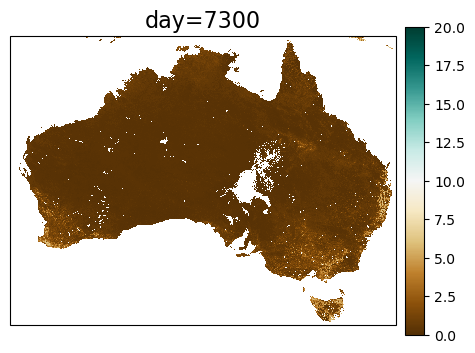

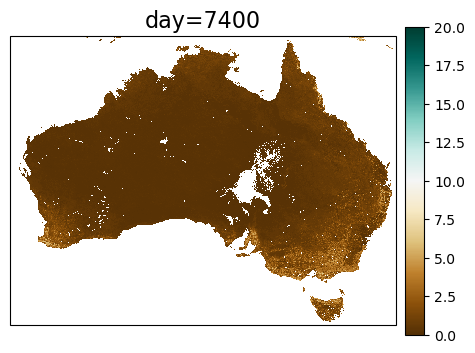

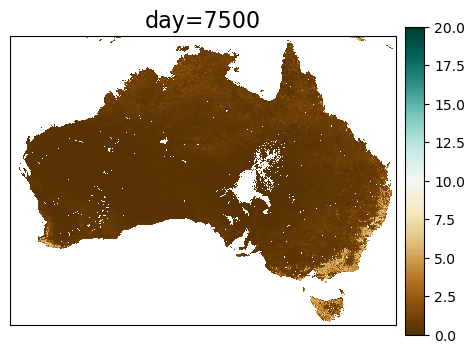

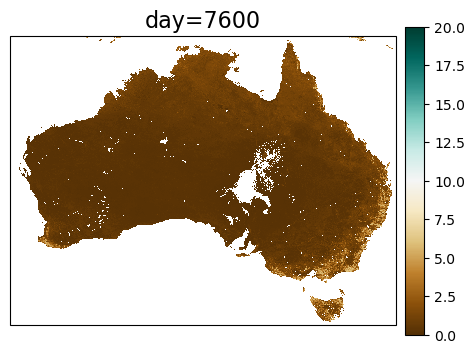

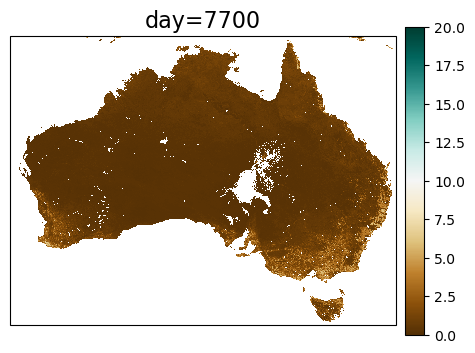

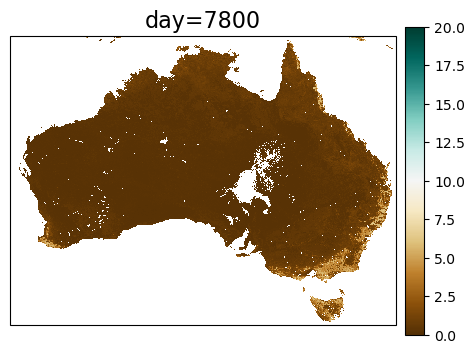

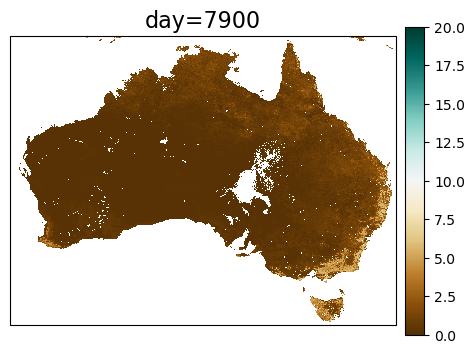

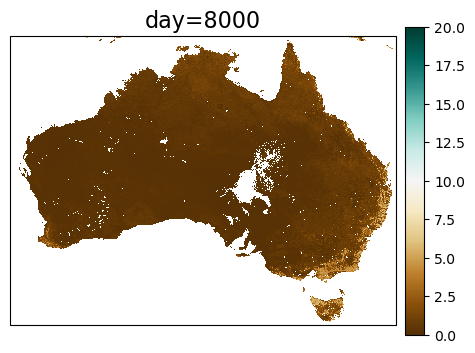

In [28]:
for i in np.arange(0,len(accumulated_var[:,0,0]),100):
    
    # ================== Start Plotting =================
    fig = plt.figure(figsize=(6,5))
    ax  = plt.axes(projection=ccrs.PlateCarree())

    # start plotting
    if loc_lat == None:
        ax.set_extent([135,155,-40,-25])
    else:
        ax.set_extent([loc_lon[0],loc_lon[1],loc_lat[0],loc_lat[1]])

    # ax.coastlines(resolution="50m",linewidth=1)

    # Add gridlines
    gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='black', linestyle='--')
    gl.xlabels_top   = False
    gl.ylabels_right = False
    gl.xlines        = True

    if loc_lat == None:
        gl.xlocator = mticker.FixedLocator([135,140,145,150,155])
        gl.ylocator = mticker.FixedLocator([-40,-35,-30,-25])
    else:
        gl.xlocator = mticker.FixedLocator(loc_lon)
        gl.ylocator = mticker.FixedLocator(loc_lat)

    gl.xformatter   = LONGITUDE_FORMATTER
    gl.yformatter   = LATITUDE_FORMATTER
    gl.xlabel_style = {'size':10, 'color':'black'}
    gl.ylabel_style = {'size':10, 'color':'black'}

    cmap  = plt.cm.BrBG

    extent = (min(loc_lon), max(loc_lon), min(loc_lat), max(loc_lat))
    plot   = ax.imshow(accumulated_var[i,:,:], origin="lower", extent=extent, interpolation="none", vmin=0, vmax=20, transform=ccrs.PlateCarree(), cmap=cmap)

    plt.title('day='+str(i), size=16)
    cb = plt.colorbar(plot, ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
    # cb.set_label(units,size=14,rotation=270,labelpad=15)
    cb.ax.tick_params(labelsize=10)

    plt.savefig('./plots/check_MODIS/MODIS_LAI_i='+str(i)+'.png',dpi=300)

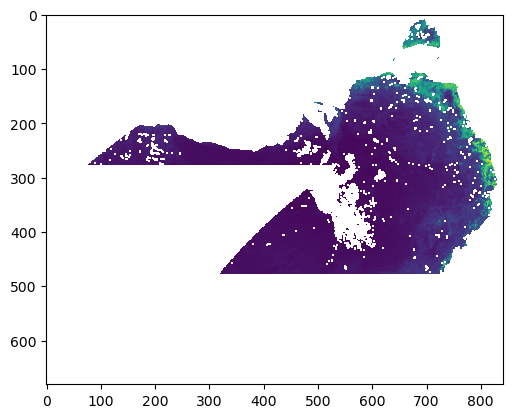

In [61]:
plt.imshow(accumulated_var[6622,:,:])

# Gap filling

In [4]:
checked_file = '/g/data/w97/mm3972/data/MODIS/MODIS_LAI/AUS/regrid_2_AWAP_5km_daily/MCD15A3H.061_500m_aid0001_LAI_regridded_daily_2002-2024.nc'

In [ ]:
f_check = nc.Dataset(checked_file,'r+')
var     = f_check.variables['Lai_500m'][:]

In [ ]:
# ================== Start Plotting =================
fig = plt.figure(figsize=(6,5))
ax  = plt.axes(projection=ccrs.PlateCarree())

# start plotting
if loc_lat == None:
    ax.set_extent([135,155,-40,-25])
else:
    ax.set_extent([loc_lon[0],loc_lon[1],loc_lat[0],loc_lat[1]])

# ax.coastlines(resolution="50m",linewidth=1)

# Add gridlines
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,linewidth=1, color='black', linestyle='--')
gl.xlabels_top   = False
gl.ylabels_right = False
gl.xlines        = True

if loc_lat == None:
    gl.xlocator = mticker.FixedLocator([135,140,145,150,155])
    gl.ylocator = mticker.FixedLocator([-40,-35,-30,-25])
else:
    gl.xlocator = mticker.FixedLocator(loc_lon)
    gl.ylocator = mticker.FixedLocator(loc_lat)

gl.xformatter   = LONGITUDE_FORMATTER
gl.yformatter   = LATITUDE_FORMATTER
gl.xlabel_style = {'size':10, 'color':'black'}
gl.ylabel_style = {'size':10, 'color':'black'}

cmap  = plt.cm.BrBG

extent = (min(loc_lon), max(loc_lon), min(loc_lat), max(loc_lat))
plot   = ax.imshow(var[0,:,:], origin="lower", extent=extent, interpolation="none", vmin=np.min(var), vmax=np.max(var), transform=ccrs.PlateCarree(), cmap=cmap)

plt.title('day='+str(i), size=16)
cb = plt.colorbar(plot, ax=ax, orientation="vertical", pad=0.02, aspect=16, shrink=0.8)
# cb.set_label(units,size=14,rotation=270,labelpad=15)
cb.ax.tick_params(labelsize=10)

In [ ]:
f_check.variables['Lai_500m'][:]